In [2]:
import os
import socket
import subprocess
import pandas as pd
import io
from contextlib import redirect_stdout
import itertools
import warnings
from datetime import datetime
import time
import timeout_decorator
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
import tikzplotlib

In [4]:
def islocal(): return socket.gethostname()=="rc-idsia-macBook.local"
def isserver(): return socket.gethostname()=="ec6120930b2d"
def strdate(): return datetime.today().strftime('%Y-%m-%d-%H-%M-%S')

if islocal():
    prj_path = "/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/"
    os.environ['JAVA_HOME'] = "/Library/Java/JavaVirtualMachines/openjdk-12.0.1.jdk/Contents/Home"
elif isserver():
    prj_path="/home/rcabanas/work_java_crema/crema/CreMA"
else:
    warnings.warn("Unknown server, set prj_path variable manually.")
os.chdir(prj_path)
!pwd

/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema


In [5]:
os.chdir(prj_path)
!pwd

/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema


In [6]:
exp_folder = f"{prj_path}/papers/pgm20/experiments/"
log_folder = f"{exp_folder}/logs/"
res_folder = f"{exp_folder}/results/"
img_folder = f"{exp_folder}/img/"

In [7]:
sys.path.append(exp_folder)
from utilplots import *

In [10]:
# Trees
binResExo6 = {
    "markovian_ev" : f"{res_folder}/2020-05-10-18-28-51_chain_markovian_ev.csv",
    "nonmarkovian_ev": f"{res_folder}/2020-05-15-06-25-18_chain_nonmarkovian_ev.csv",
    "nonmarkovian_prec" : f"{res_folder}/2020-05-22-21-26-51_chain_nonmarkovian_prec.csv"

}

# Polytrees
rhmmRes = {
    "nonmarkovian_ev": f"{res_folder}/2020-05-28-18-05-29_rhmm_nonmarkovian_ev.csv", 
    "nonmarkovian_prec": f"{res_folder}/2020-05-29-00-36-55_rhmm_nonmarkovian_prec.csv"
}

# Multiply connected
squares = {
    "nonmarkovian_ev" : f"{res_folder}/2020-05-28-20-57-36_squares_nonmarkovian_ev.csv",
    "nonmarkovian_prec": f"{res_folder}/2020-05-26-08-29-39_squares_nonmarkovian_prec.csv"
       
}


In [11]:
res_ = {
    "Trees":binResExo6,
    "Polytree":rhmmRes,
    "Muliply connected" : squares
}

method=='CCALP'
mean = 4.206649852727272 std = 2.784876958630109
method=='CCVE'
mean = 16.78607437375 std = 32.1541415806527
method=='CVE'
mean = 1.8528217388888888 std = 4.415859957830618
method=='CCALP'
mean = 11.89622344 std = 8.073591612047508
method=='CCVE'
mean = 3.5635344944444434 std = 4.6272500481932335
method=='CVE'
mean = 8.943243879999999 std = 17.121017160624028
method=='CCALP'
mean = 13.250502833846156 std = 10.314502622290512
method=='CCVE'
mean = 10.707062239999999 std = 14.790176118644348
method=='CVE'
mean = 8.780493277500002 std = 15.857139279883407
[Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]


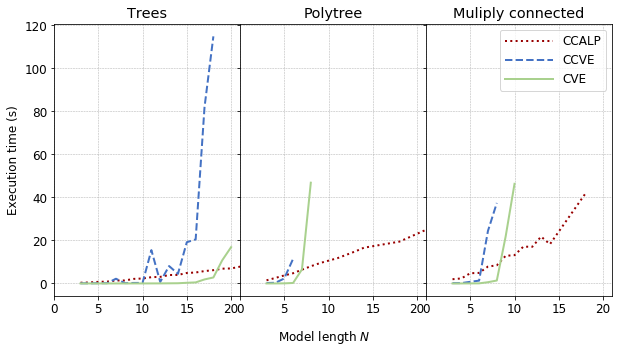

In [12]:
from pylab import rcParams
#rcParams['axes.xmargin'] = 0.05
rcParams['axes.ymargin'] = 0.05
plt.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(1, len(list(res_)), figsize=(10,5), sharey=True)

plot_func = plot_time
ylabel = "Execution time (s)"
#fig.suptitle("Time")
#fig.subplots_adjust(top=0.93)

def duplicate_N(data): 
    data["N"] = data["N"]*2; 
    return data

def to_seconds(data): 
    data["time"] = data["time"]/1000; 
    return data
    
plotted_data = {};
    
for k,v in res_.items():
    
    i = list(res_).index(k)
    
    T = []

    #T = [duplicate_N] if "HMM" in k else []
    
    T.append(to_seconds)

    
    data = pd.read_csv(v["nonmarkovian_ev"])
    
    _,dataout = plot_func(data, 
          ax=axs[i],
          transformation=T,
          title=f"{k}",
          xlabel=" ", ylabel=" ", legend=False)
    
    plotted_data[k] = dataout

    

    #axs[i].get_lines()[0].set_color("black")
    
    blue = "#4472C4"
    red = "#980000" 
    green = "#A9D18E"
    
    colors = [red, blue, green]
    style = ["dotted", "dashed", "solid"]
    marker = ["","",""]

    for k in range(0,3):
        axs[i].get_lines()[k].set_marker(marker[k])
        axs[i].get_lines()[k].set_linestyle(style[k])
        axs[i].get_lines()[k].set_color(colors[k])
        axs[i].get_lines()[k].set_linewidth(2)
        
#########   


axs[0].set_xlim(0,21)

# change y axis
for k in range(1,len(axs)):
    axs[k].set_xlim(axs[0].get_xlim())

for k in range(0,len(axs)):
    axs[k].grid(linestyle='--', linewidth=0.5)


#axs[1].xaxis.get_major_ticks()[-2].set_visible(False)  


axs[0].set_ylabel(ylabel)
axs[-1].legend(handlelength=4)


fig.text(0.5, 0.00, 'Model length $N$', ha='center')

#plt.tight_layout(pad=0)
plt.subplots_adjust(wspace=0, hspace=0)  

k=0
#[t.set_visible(False)  for t in axs[k].xaxis.get_major_ticks() if t.label.get_text()=="25"]
print([t.label for t in axs[k].xaxis.get_major_ticks()])
for k in range(0,len(axs)):
    axs[k].xaxis.get_major_ticks()[5].set_visible(False)

tikzplotlib.save(f"{img_folder}/time_results.tex")
plt.savefig(f"{img_folder}/time_results.pdf")

#[t.set_visible(False)  for t in axs[k].xaxis.get_major_ticks() if t.label.get_text()=="25"]


In [16]:
#!pip install sklearn
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
#import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


def max_size_minute(x_train, y_train):
    regressor = LinearRegression()  
    regressor.fit(x_train, y_train) #training the algorithm
    beta = regressor.intercept_
    alpha = regressor.coef_
    return int((60 - beta)/alpha)

for k,v in plotted_data.items():
    d = v.query("method=='CCALP'")
    x_train = d.filter(["N"]).to_numpy(dtype="float32")
    y_train = d.filter(["time"]).to_numpy(dtype="float32").flatten()
    print(f"{max_size_minute(x_train,y_train)} for {k}")
      




141 for Trees
46 for Polytree
29 for Muliply connected


/Users/rcabanas/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Users/rcabanas/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice


model=='Muliply connected'
mean = 0.00809714874882777 std = 0.008098007525621129
model=='Polytree'
mean = 0.00012850181833403066 std = 0.00022257167821952697
model=='Trees'
mean = 0.07137354432915641 std = 0.07080278513271306


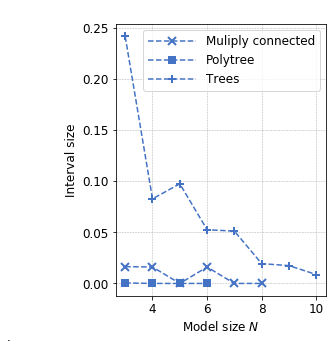

In [17]:
from pylab import rcParams
#rcParams['axes.xmargin'] = 0.05
#rcParams['axes.ymargin'] = 0.05

fig, axs = plt.subplots(1, 1, figsize=(4,5))

plot_func = plot_size
ylabel = "Interval size"

D = []
for k,v in res_.items():
    d = pd.read_csv(v["nonmarkovian_prec"], index_col=0);
    d = d.query("method=='CCVE'")
    d["model"] = k
    D = D + [d]

data = pd.concat(D)

    
_,plotted_size = plot_func(data, 
      ax=axs, series_column = "model", 
      title=" ", xlabel="Model size $N$", ylabel=ylabel, legend=False)


colors = [blue, blue, blue]
style = ["dashed", "dashed", "dashed"]
marker = ["x","s","+"]
msize = [8,6, 8]

for k in range(0,3):
    axs.get_lines()[k].set_markeredgewidth(2)
    axs.get_lines()[k].set_markersize(msize[k])
    axs.get_lines()[k].set_marker(marker[k])
    axs.get_lines()[k].set_linestyle(style[k])
    axs.get_lines()[k].set_color(colors[k])
    
    

axs.grid(linestyle='--', linewidth=0.5)

axs.legend(handlelength=4)

plt.subplots_adjust(wspace=0, hspace=10)  
fig.text(-0.2, 0.0, '.', ha='center')

plt.gcf().subplots_adjust(left=0.17)

tikzplotlib.save(f"{img_folder}/size_results.tex")
plt.savefig(f"{img_folder}/size_results.pdf")

/Users/rcabanas/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rcabanas/.pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


method=='CCALP'
mean = 0.006082434542998447 std = 0.007771294089968186
method=='CCVE'
mean = 0.0 std = 0.0
method=='CCALP'
mean = 0.00028982879866006934 std = 8.974508146179517e-05
method=='CCVE'
mean = 0.0 std = 0.0
method=='CCALP'
mean = 0.00025942581682274906 std = 5.775924992662314e-05
method=='CCVE'
mean = 0.0 std = 0.0


,method,N,rmse
0,CCALP,4,0.00022667378049049248
1,CCALP,5,0.00019100209618648313
2,CCALP,6,0.0003518947648607215
3,CCALP,7,0.00029796798200470976
4,CCALP,8,0.00022959046057133867
0,CCVE,4,0.0
1,CCVE,5,0.0
2,CCVE,6,0.0
3,CCVE,7,0.0
4,CCVE,8,0.0


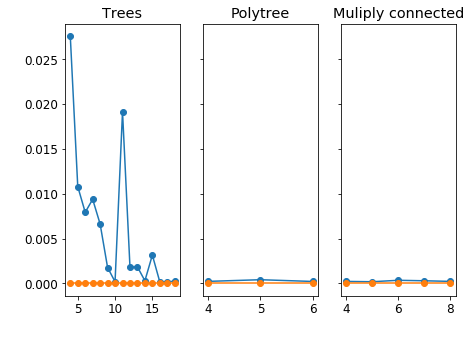

In [170]:
from pylab import rcParams
#rcParams['axes.xmargin'] = 0.05
rcParams['axes.ymargin'] = 0.05

fig, axs = plt.subplots(1, len(list(res_)), figsize=(7,5), sharey=True)

plot_func = plot_rmse
ylabel = "time (s.)"
#fig.suptitle("Time")
#fig.subplots_adjust(top=0.93)

def duplicate_N(data): 
    data["N"] = data["N"]*2; 
    return data

def to_seconds(data): 
    data["time"] = data["time"]/1000; 
    return data
    

for k,v in res_.items():
    
    i = list(res_).index(k)
    
    T = []

    #T = [duplicate_N] if "HMM" in k else []
    
    T.append(to_seconds)

    
    data = pd.read_csv(v["nonmarkovian_ev"])
    
    _,dataout = plot_func(data.query("N>3"), 
          ax=axs[i],
          transformation=T,
          title=f"{k}",
          xlabel=" ", ylabel=" ", legend=False)


dataout    